You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()

In [2]:
import pandas as pd
bc_df=pd.DataFrame(data=bc.data,columns=bc.feature_names)
bc_df['target']=bc.target

In [3]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
print('No. of rows:',bc_df.shape[0])
print('No. of cols:',bc_df.shape[1])

No. of rows: 569
No. of cols: 31


In [5]:
# feature names
bc_df.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

## I observed that there is space in columns name it create issue so i replace with underscore

In [6]:
bc_df.columns=bc_df.columns.str.replace(' ','_')

In [7]:
bc_df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## I observe that some feataure have min=0 means some feature have 0 value

In [8]:
for k in bc_df.keys():
    if bc_df[k].min()==0:
        print(k)

mean_concavity
mean_concave_points
concavity_error
concave_points_error
worst_concavity
worst_concave_points
target


In [9]:
bc_df[bc_df.mean_concavity==0]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818,...,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382,1
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422,...,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151,1
174,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975,...,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164,1
175,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,0.06724,...,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848,1
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559,1
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,0.07359,...,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116,1
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,0.07098,...,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865,1
473,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,0.05960,...,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743,1
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,0.07285,...,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938,1
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,0.05948,...,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592,1


## After analysis value may be zero not must worry about that

In [10]:
bc_df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean_compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean_concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean_concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean_symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean_fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [11]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean_radius                569 non-null float64
mean_texture               569 non-null float64
mean_perimeter             569 non-null float64
mean_area                  569 non-null float64
mean_smoothness            569 non-null float64
mean_compactness           569 non-null float64
mean_concavity             569 non-null float64
mean_concave_points        569 non-null float64
mean_symmetry              569 non-null float64
mean_fractal_dimension     569 non-null float64
radius_error               569 non-null float64
texture_error              569 non-null float64
perimeter_error            569 non-null float64
area_error                 569 non-null float64
smoothness_error           569 non-null float64
compactness_error          569 non-null float64
concavity_error            569 non-null float64
concave_points_error       569 non-null float64
symmetry_error             569 

## I observer that there is no categorical features

In [12]:
bc_df.isna().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
target                     0
dtype: int64

In [13]:
bc_df.isnull().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
target                     0
dtype: int64

## I observer that there is no na and null features

In [14]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Create an instance of the LocalOutlierFactor class
lof = LocalOutlierFactor(n_neighbors=10)

# Select the columns you want to consider for outlier detection
columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
           'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry',
           'mean_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter',
           'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity',
           'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']

# Apply LOF outlier detection on the selected columns
outlier_labels = lof.fit_predict(bc_df[columns])

# Get the outlier scores
outlier_scores = lof.negative_outlier_factor_

# Add the outlier labels and scores as new columns in the DataFrame
bc_df['outlier_label'] = outlier_labels
bc_df['outlier_score'] = outlier_scores

# Print the DataFrame with the outlier labels and scores
print(bc_df[['outlier_label','outlier_score']])


     outlier_label  outlier_score
0                1      -1.489320
1                1      -0.993518
2                1      -0.972446
3               -1      -2.218446
4                1      -1.156291
5                1      -1.450552
6                1      -0.985123
7                1      -1.269557
8                1      -1.355904
9               -1      -1.508049
10               1      -0.979807
11               1      -1.065340
12               1      -1.179254
13               1      -1.109364
14               1      -0.958006
15               1      -1.047192
16               1      -1.282167
17               1      -1.094834
18               1      -1.344099
19               1      -0.957872
20               1      -0.981341
21               1      -1.026997
22               1      -0.992616
23               1      -1.160271
24              -1      -1.818053
25               1      -1.116510
26               1      -1.079942
27               1      -1.044014
28            

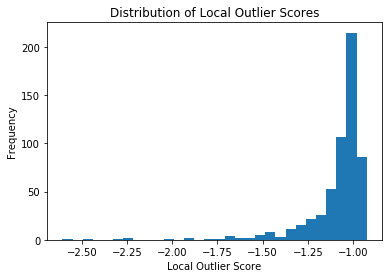

In [31]:
import matplotlib.pyplot as plt

# Extract the LOS values
los = bc_df['outlier_score']

# Plot the LOS as a histogram
plt.hist(los, bins=30)
plt.xlabel('Local Outlier Score')
plt.ylabel('Frequency')
plt.title('Distribution of Local Outlier Scores')
plt.show()


In [16]:
print(f'there are {len(bc_df)} data points in total')
print(f'{len(bc_df[bc_df["outlier_score"]<-1.50])} data points have a Local Outlier Score (LOS) below -1.50')

there are 569 data points in total
21 data points have a Local Outlier Score (LOS) below -1.50


In [20]:
# remove outlier
without_bc = bc_df[bc_df['outlier_score'] >= -1.5]

# rwset index
without_bc.reset_index(drop=True,inplace=True)

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [21]:
from sklearn.model_selection import train_test_split
X=without_bc.drop('target',axis=1)
Y=without_bc.target
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.9272727272727272


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'min_samples_leaf' : [1,2,3,4,5],
    'splitter' : ["best", "random"],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)

print(accuracy)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
0.9363636363636364


In [24]:
hyper_tree=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,min_samples_split=5,splitter='random')

# fit decision tree
hyper_tree.fit(X_train,y_train)

# predict with grid searc
y_pred=hyper_tree.predict(X_test)

accuracy_score(y_test,y_pred)


0.9363636363636364

|            | without hypertune | with hypertune |
|------------|-------------------|----------------|
| Accuracy   | 0.9494            | 0.9797        |


Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score 

In [26]:
print('accuracy: ',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test))
print('recall:',recall_score(y_pred,y_test))
print('f1_score:',f1_score(y_pred,y_test))
print('roc_auc_score:',roc_auc_score(y_pred,y_test))
print('confusion_matrix:\n',confusion_matrix(y_pred,y_test))


accuracy:  0.9363636363636364
precision: 0.9365079365079365
recall: 0.9516129032258065
f1_score: 0.944
roc_auc_score: 0.9341397849462366
confusion_matrix:
 [[44  4]
 [ 3 59]]


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

X[23]<=769.375

gini=0.432

sample=396

value=[125,271]

In [27]:
print(without_bc.columns[23],'is a most important feature because gini=0.432')

print('sample:',len(X_train.worst_area))

print('the parent node has 125 samples belonging to one class and 271 samples belonging to another class')

worst_area is a most important feature because gini=0.432
sample: 438
the parent node has 125 samples belonging to one class and 271 samples belonging to another class


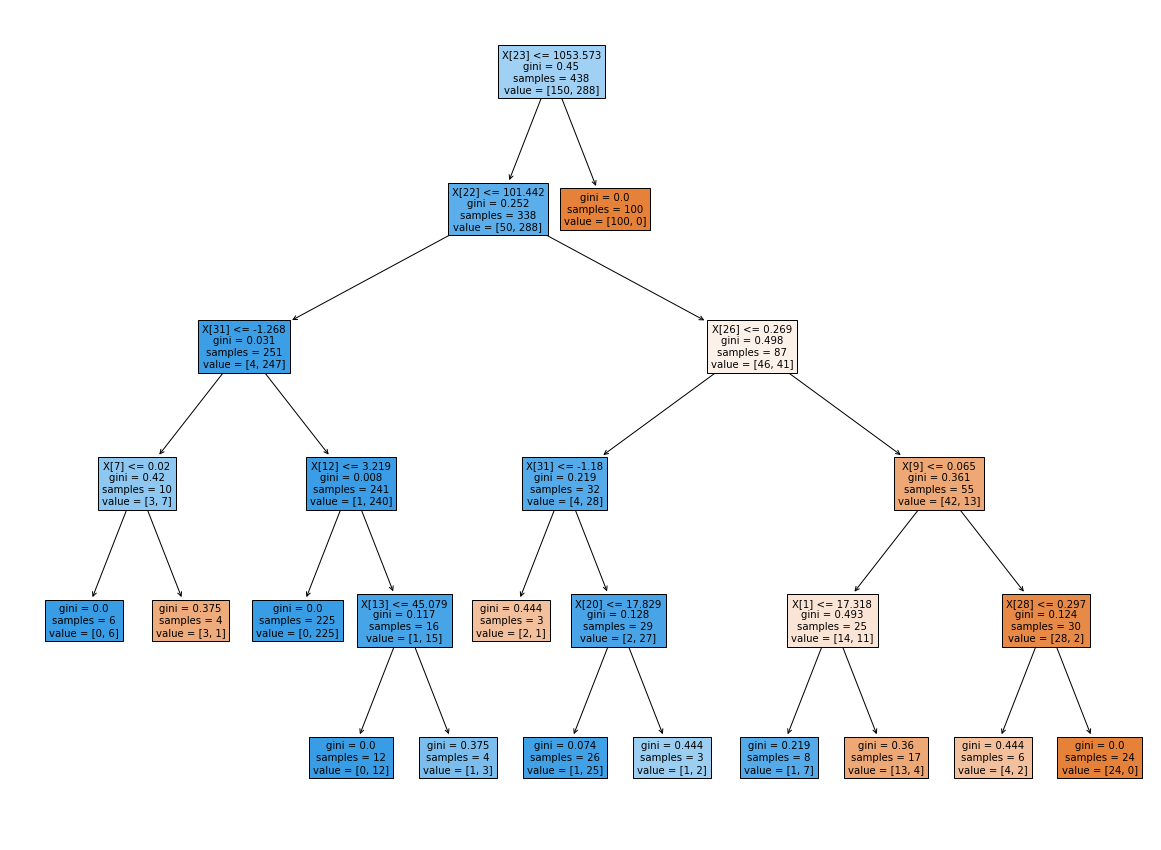

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(decision_tree=hyper_tree, filled=True)
plt.show()

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

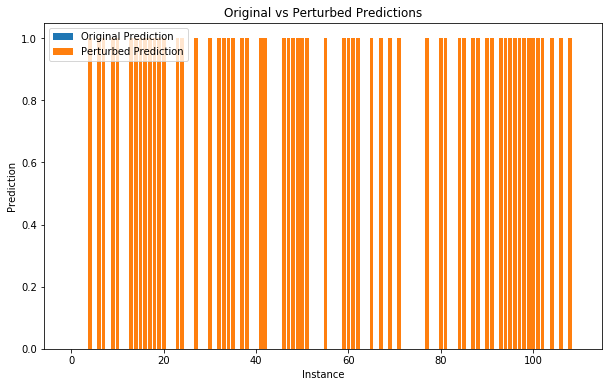

In [67]:
import matplotlib.pyplot as plt

# Initialize lists to store original predictions and perturbed predictions
original_predictions = []
perturbed_predictions = []

for i in range(len(X_test)):
    # Select a specific instance from the dataset
    instance = X_test.iloc[i].values

    # Get the predicted class for the instance
    predicted_class = hyper_tree.predict([instance])[0]

    # Perturb the values of one or more input variables
    perturbed_instance = instance.copy()
    perturbed_instance[0] += 1.0  # Perturb the first feature

    # Get the predicted class for the perturbed instance
    perturbed_class = hyper_tree.predict([perturbed_instance])[0]

    # Compare the original and perturbed predictions
    #print("Original Prediction:", predicted_class)
    #print("Perturbed Prediction:", perturbed_class)
    
    original_predictions.append(predicted_class)
    perturbed_predictions.append(perturbed_class)

# Plot the original and perturbed predictions
plt.figure(figsize=(10, 6))
plt.bar(range(len(original_predictions)), original_predictions, label='Original Prediction')
plt.bar(range(len(perturbed_predictions)), perturbed_predictions, label='Perturbed Prediction')
plt.xlabel('Instance')
plt.ylabel('Prediction')
plt.title('Original vs Perturbed Predictions')
plt.legend()
plt.show()


Here’s the dataset link:
Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?
usp=sharing

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!